## Imports

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
# import load_iris function from datasets module
from sklearn.datasets import load_iris
from mlutils.features import *
from mlutils.plot import *
import pandas as pd
import numpy as np
import seaborn as sns

sns.set()
sns.set_style('whitegrid')
sns.set_palette('Dark2')

## Load Data

In [3]:
# save "bunch" object containing iris dataset and its attributes
iris = load_iris()

x_raw = iris.data
y_raw = iris.target

x_raw.shape, y_raw.shape

((150, 4), (150,))

In [4]:
column_names = iris.feature_names

df_raw = pd.DataFrame(x_raw, columns=column_names)
df_raw.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Looking at column types and mem usage

In [5]:
df_raw.shape

(150, 4)

In [6]:
df_raw.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [7]:
display_mem_usage(df_raw)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB
None

Total memory usage for float columns: 0.00 MB
Total memory usage for int columns: 0.00 MB
Total memory usage for object columns: 0.00 MB
Total memory usage for bool columns: 0.00 MB
Total memory usage for category columns: 0.00 MB

Average memory usage for float columns: 0.00 MB
Average memory usage for int columns: 0.00 MB
Average memory usage for object columns: 0.00 MB
Average memory usage for bool columns: 0.00 MB
Average memory usage for category columns: 0.00 MB


## Preprocessing

In [8]:
# now we need to turn all strings into categorical columns
create_categories(df_raw)

In [9]:
# let's check if we have missing values
detect_missing(df_raw)

,Total,Percent


In [10]:
# simple preprocess
df, _ , nas = process_dataframe(df_raw)
df.shape, nas

y = y_raw

## Train a Random Forest

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from mlutils.models.classification import *
from mlutils.models.trees import *

m = RandomForestClassifier(n_jobs=-1, oob_score=True)

In [12]:
train_classifier(m, df, y)

Accuracy (Training): 1.0
          OOB Score: 0.9266666666666666


In [13]:
train_classifier_cv(m, df, y, k_folds=10);

Accuracy (Training):  1.0
Average accuracy score using 10-fold crossvalidation:  0.9666666666666666


In [14]:
# create validation data
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.20, random_state=1)

In [15]:
train_classifier(m, X_train, y_train)
preds = predict_and_evaluate_classifier(m, X_test, y_test)

Accuracy (Training): 1.0
          OOB Score: 0.9333333333333333
     Accuracy score: 0.96667


### Using a single shallow tree to visualize features

In [16]:
m = RandomForestClassifier(n_estimators=1, max_depth=3, bootstrap=False, n_jobs=-1)
train_classifier(m, X_train, y_train)
preds = predict_and_evaluate_classifier(m, X_test, y_test)

Accuracy (Training): 0.95
     Accuracy score: 0.96667


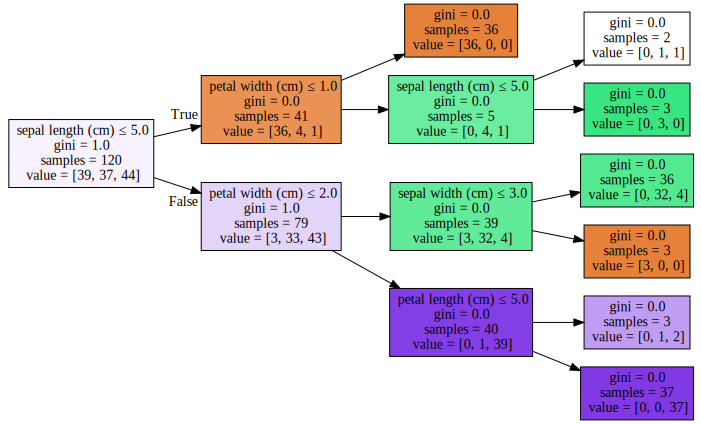

In [17]:
draw_tree(m.estimators_[0], df)

## Using a deeper tree

In [18]:
m = RandomForestClassifier(n_estimators=1, bootstrap=False, n_jobs=-1)
train_classifier(m, X_train, y_train)
preds = predict_and_evaluate_classifier(m, X_test, y_test)

Accuracy (Training): 1.0
     Accuracy score: 0.93333


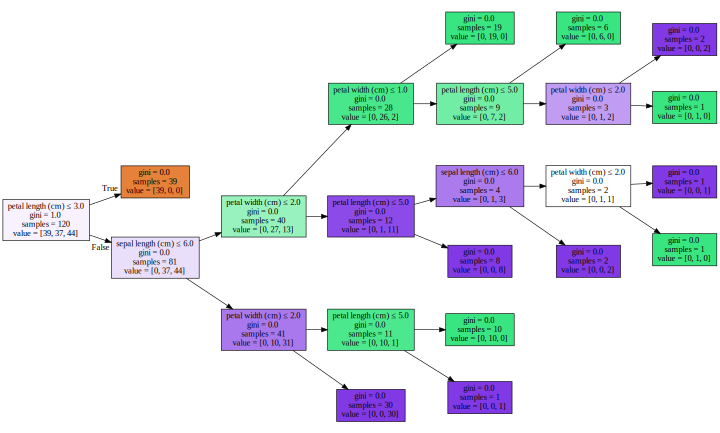

In [19]:
draw_tree(m.estimators_[0], df)

## How many estimators?

In [20]:
m = RandomForestClassifier(n_estimators=20, n_jobs=-1)
train_classifier(m, X_train, y_train)
m_preds = predict_and_evaluate_classifier(m, X_test, y_test)

Accuracy (Training): 1.0
     Accuracy score: 0.96667


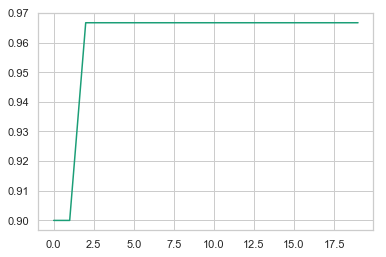

In [21]:
analyze_estimators_growth_accuracy(m, X_test, y_test)

## Are we overfitting?

In [22]:
m = RandomForestClassifier(n_estimators=20, n_jobs=-1, oob_score=True)
train_classifier(m, X_train, y_train)
m_preds = predict_and_evaluate_classifier(m, X_test, y_test)

Accuracy (Training): 0.9916666666666667
          OOB Score: 0.9416666666666667
     Accuracy score: 0.96667


In [23]:
t=m.estimators_[0].tree_
dectree_max_depth(t)

7

In [24]:
m = RandomForestClassifier(n_estimators=20, n_jobs=-1, min_samples_leaf=5, oob_score=True)
train_classifier(m, X_train, y_train)
m_preds = predict_and_evaluate_classifier(m, X_test, y_test)

Accuracy (Training): 0.975
          OOB Score: 0.9416666666666667
     Accuracy score: 0.96667


In [25]:
t=m.estimators_[0].tree_
dectree_max_depth(t)

4

## Confidence Level

In [26]:
m = RandomForestClassifier(n_estimators=20, n_jobs=-1, min_samples_leaf=3, oob_score=True)
train_classifier(m, X_train, y_train)
m_preds = predict_and_evaluate_classifier(m, X_test, y_test)

Accuracy (Training): 0.9833333333333333
          OOB Score: 0.975
     Accuracy score: 0.96667


In [27]:
preds = np.stack([t.predict(X_test) for t in m.estimators_])
x = X_test.copy()
x['pred'] = stats.mode(preds, axis=0)[0][0].astype('int')
x['truth'] = y_test
x.reset_index(drop=True, inplace=True)
x.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),pred,truth
0,5.8,4.0,1.2,0.2,0,0
1,5.1,2.5,3.0,1.1,1,1
2,6.6,3.0,4.4,1.4,1,1
3,5.4,3.9,1.3,0.4,0,0
4,7.9,3.8,6.4,2.0,2,2
5,6.3,3.3,4.7,1.6,1,1
6,6.9,3.1,5.1,2.3,2,2
7,5.1,3.8,1.9,0.4,0,0
8,4.7,3.2,1.6,0.2,0,0
9,6.9,3.2,5.7,2.3,2,2


In [28]:
x[x.truth != x.pred]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),pred,truth
22,6.7,3.0,5.0,1.7,2,1


In [29]:
cm = confusion_matrix(y_test, m_preds)

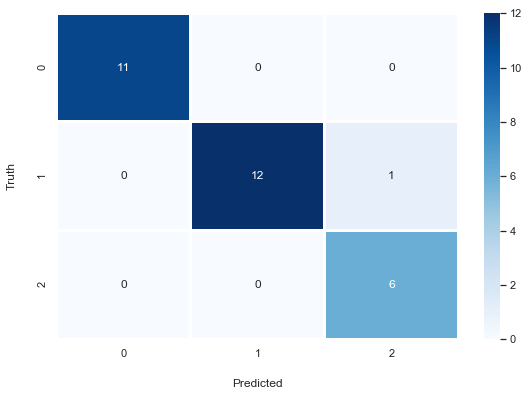

In [30]:
plot_confusion_matrix(cm, iris.target_names)

In [31]:
np.unique(preds[:,22], return_counts=True)

(array([2.]), array([20]))

## Feature Importance

In [32]:
m = RandomForestClassifier(n_estimators=20, n_jobs=-1, min_samples_leaf=3, oob_score=True)
train_classifier(m, X_train, y_train)
m_preds = predict_and_evaluate_classifier(m, X_test, y_test)

Accuracy (Training): 0.975
          OOB Score: 0.95
     Accuracy score: 0.96667


In [33]:
fi = rf_feat_importance(m, X_train); fi

,cols,imp
2,petal length (cm),0.560011
3,petal width (cm),0.332979
0,sepal length (cm),0.096847
1,sepal width (cm),0.010163


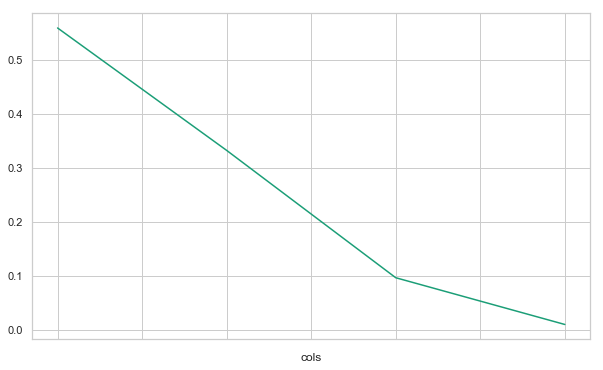

In [34]:
fi.plot('cols', 'imp', figsize=(10,6), legend=False);

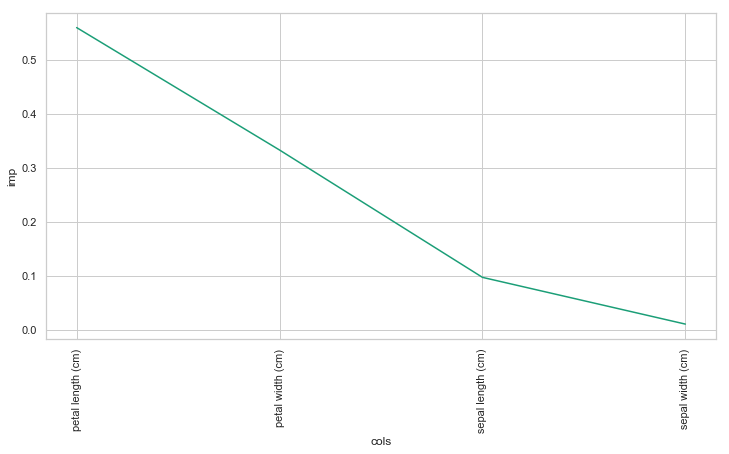

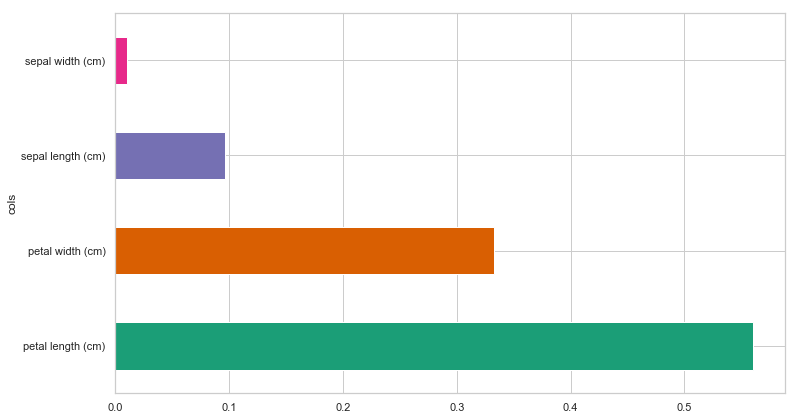

In [35]:
plot_feat_importance(fi)

In [36]:
# let's remove the least important features
to_keep = fi[fi.imp>0.05].cols
to_keep

2    petal length (cm)
3     petal width (cm)
0    sepal length (cm)
Name: cols, dtype: object

In [37]:
# list of columns being removed
np.setdiff1d(df.columns.values,to_keep.values)

array(['sepal width (cm)'], dtype=object)

In [38]:
# remove columns and create new train and validation sets
df_keep = df[to_keep].copy()
X_train, X_test, y_train, y_test = train_test_split(df_keep, y, test_size=0.25, random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((112, 3), (38, 3), (112,), (38,))

In [39]:
m = RandomForestClassifier(n_estimators=20, n_jobs=-1, min_samples_leaf=3, oob_score=True)
train_classifier(m, X_train, y_train)
m_preds = predict_and_evaluate_classifier(m, X_test, y_test)

Accuracy (Training): 0.9821428571428571
          OOB Score: 0.9464285714285714
     Accuracy score: 0.97368


In [40]:
fi = rf_feat_importance(m, X_train);
fi

,cols,imp
1,petal width (cm),0.482165
0,petal length (cm),0.341801
2,sepal length (cm),0.176034


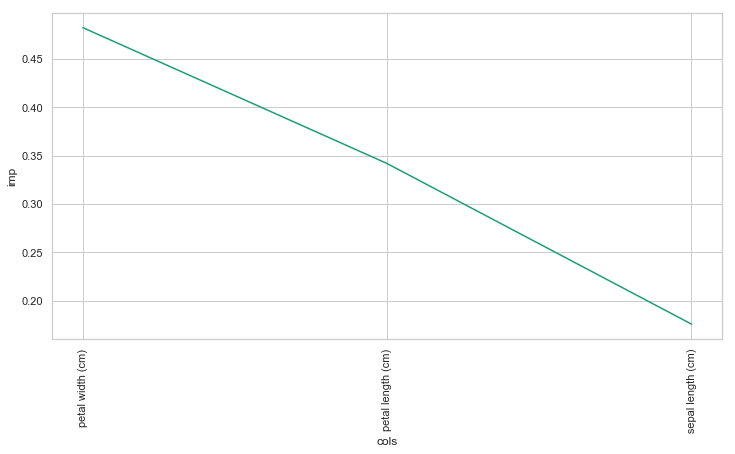

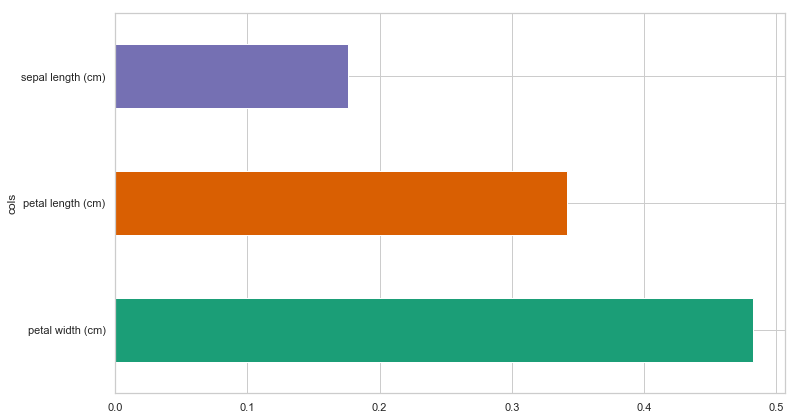

In [41]:
plot_feat_importance(fi)

## Redundant features

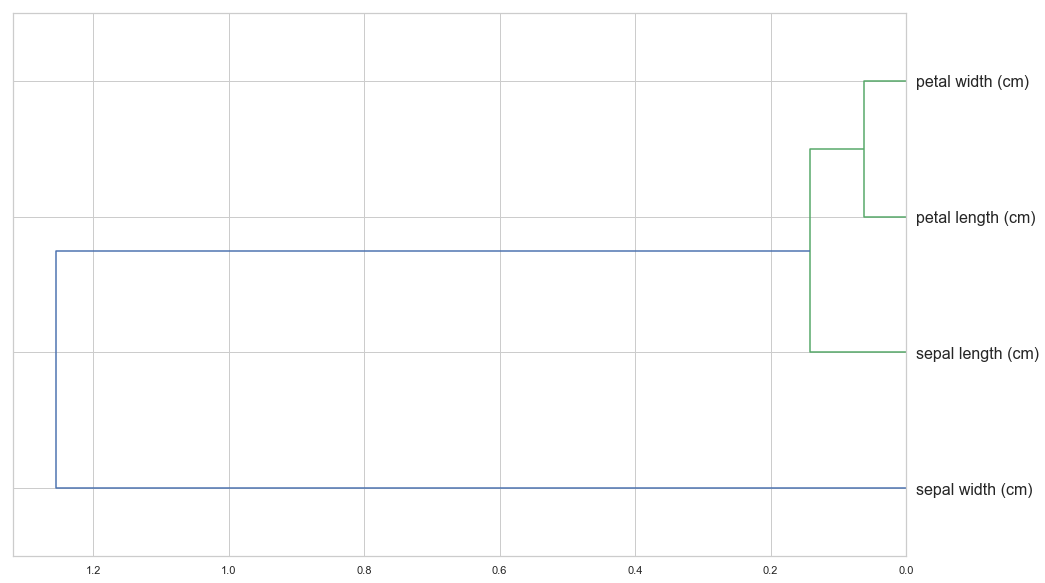

In [42]:
corr = analyze_redundant_features(df)

In [43]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.25, random_state=1)
analyze_single_feature_removal(m, X_train, y_train, X_train.columns)

Baseline - 0.9285714285714286
------------------------------
sepal length (cm) - 0.9375 (0.00893)
sepal width (cm) - 0.9375 (0.00893)
petal length (cm) - 0.9285714285714286 (0.0)
petal width (cm) - 0.9196428571428571 (-0.00893)


It seems sepal width is really not much correlated to the other features.

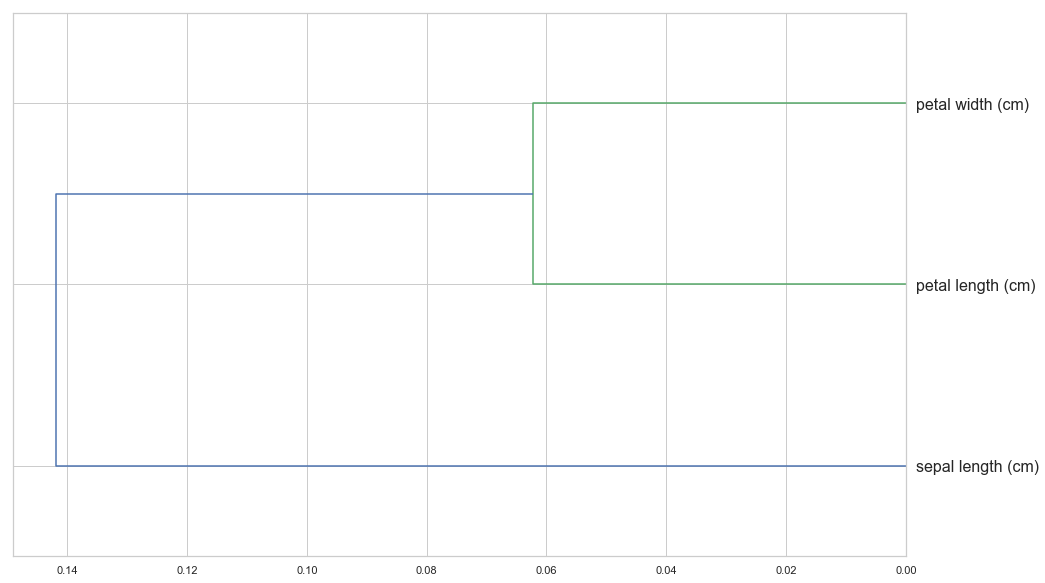

In [44]:
# let's use the already removed dataset
corr = analyze_redundant_features(df_keep)

In [45]:
X_train, X_test, y_train, y_test = train_test_split(df_keep, y, test_size=0.25, random_state=1)
analyze_single_feature_removal(m, X_train, y_train, X_train.columns)

Baseline - 0.9375
------------------------------
petal length (cm) - 0.9375 (0.0)
petal width (cm) - 0.9107142857142857 (-0.02679)
sepal length (cm) - 0.9464285714285714 (0.00893)


Also seems to indicate that removing sepal length might be good as well

In [46]:
df_keep.drop('sepal length (cm)', axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(df_keep, y, test_size=0.25, random_state=1)

In [47]:
m = RandomForestClassifier(n_estimators=100, n_jobs=-1, min_samples_leaf=3, oob_score=True)
train_classifier(m, X_train, y_train)
m_preds = predict_and_evaluate_classifier(m, X_test, y_test)

Accuracy (Training): 0.9821428571428571
          OOB Score: 0.9464285714285714
     Accuracy score: 0.97368


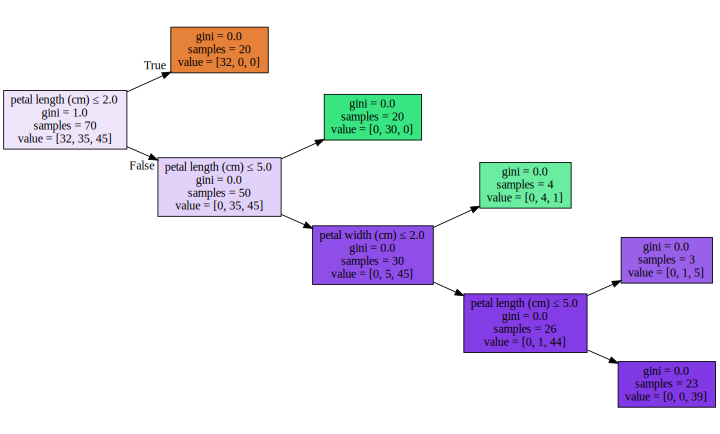

In [48]:
draw_tree(m.estimators_[0], X_train)

This looks really good. I get the same results as before with a model with just two features

## Scaling the data

In [49]:
from sklearn.preprocessing import StandardScaler

In [50]:
df_keep.head()

,petal length (cm),petal width (cm)
0,1.4,0.2
1,1.4,0.2
2,1.3,0.2
3,1.5,0.2
4,1.4,0.2


In [51]:
mean = df_keep.mean()
std = df_keep.std()

In [52]:
df_scaled = df_keep - mean
df_scaled = df_scaled / std
df_scaled.describe()

,petal length (cm),petal width (cm)
count,1.500000e+02,1.500000e+02
mean,-1.292300e-15,-5.543714e-16
std,1.000000e+00,1.000000e+00
min,-1.562342e+00,-1.442245e+00
25%,-1.222456e+00,-1.179859e+00
50%,3.353541e-01,1.320673e-01
75%,7.602115e-01,7.880307e-01
max,1.779869e+00,1.706379e+00


In [53]:
df_scaled.head()

,petal length (cm),petal width (cm)
0,-1.335752,-1.311052
1,-1.335752,-1.311052
2,-1.392399,-1.311052
3,-1.279104,-1.311052
4,-1.335752,-1.311052


In [54]:
X_train, X_test, y_train, y_test = train_test_split(df_scaled, y, test_size=0.25, random_state=1)

m = RandomForestClassifier(n_estimators=100, n_jobs=-1, min_samples_leaf=3, oob_score=True)
train_classifier(m, X_train, y_train)
m_preds = predict_and_evaluate_classifier(m, X_test, y_test)

Accuracy (Training): 0.9732142857142857
          OOB Score: 0.9375
     Accuracy score: 0.97368


## Cross-validation

In [55]:
m = RandomForestClassifier(n_estimators=100, n_jobs=-1, min_samples_leaf=3, oob_score=True)
train_classifier_cv(m, df_scaled, y, k_folds=10)
m_preds = predict_and_evaluate_classifier(m, X_test, y_test)

Accuracy (Training):  0.9733333333333334
Average accuracy score using 10-fold crossvalidation:  0.9666666666666666
     Accuracy score: 0.97368


In [56]:
fi = rf_feat_importance(m, df_scaled)
fi

,cols,imp
1,petal width (cm),0.503021
0,petal length (cm),0.496979


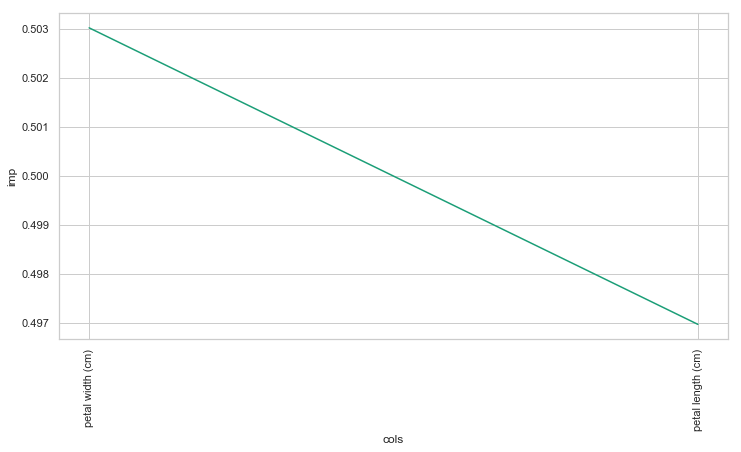

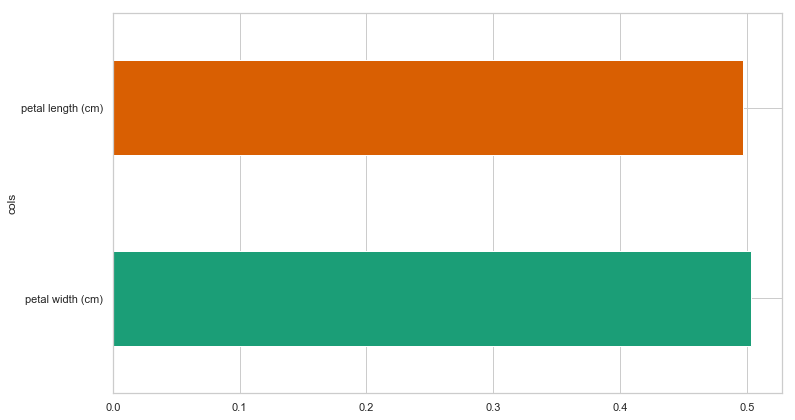

In [57]:
plot_feat_importance(fi)

## Analyzing Features

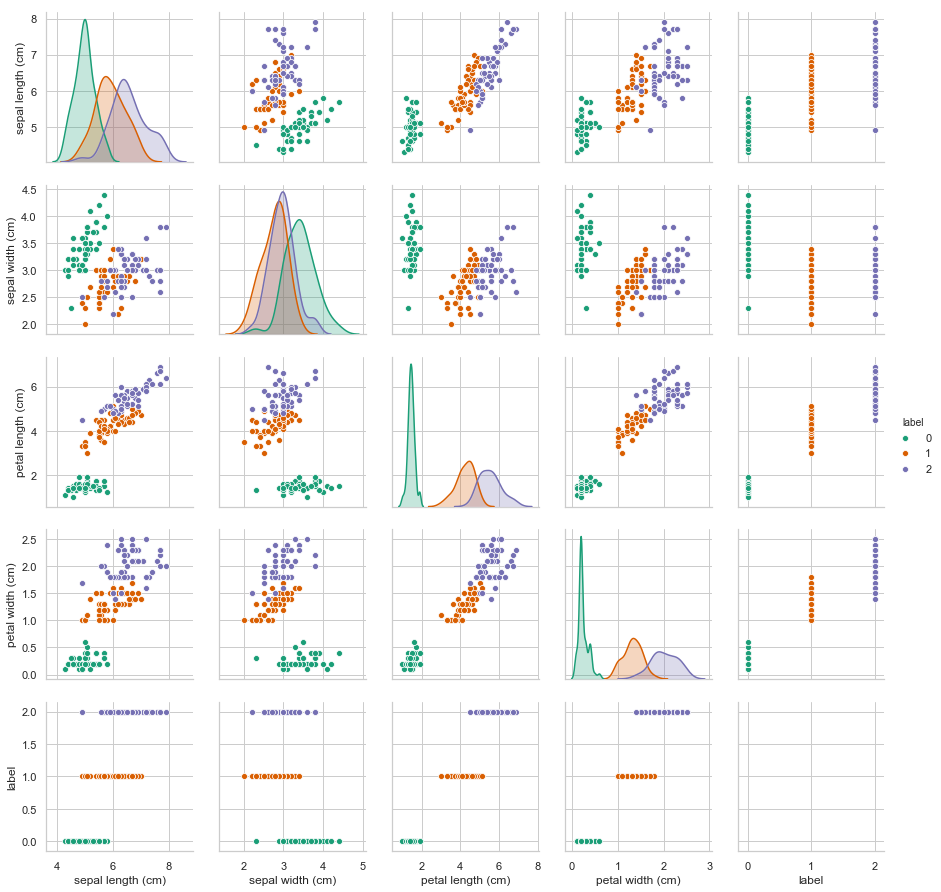

In [58]:
X = df_raw.copy()
X['label'] = y_raw
sns.pairplot(X,vars=X.columns, hue='label');

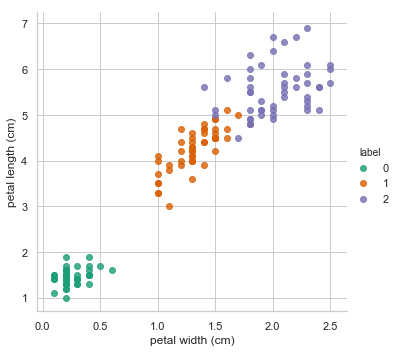

In [59]:
sns.lmplot(data=X, x='petal width (cm)', y='petal length (cm)', hue='label', fit_reg=False);